In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [316]:
import pandas as pd
df = pd.read_csv(r"C:/Users/admin/Desktop/Project2/Walmart-Sales-Data-Analysis--SQL-Project-main/Walmart Sales Data.csv.csv")

In [317]:
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date      Time      Payment    cogs  gross margin percentage  \
0  2019-01-05  13:08:00      Ewallet  522.83                 4.761905   
1  2019-03-08  10:29:00         Cash   76.40                 4.761905   
2  2019-03-

In [318]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [319]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [320]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

df['Weekday'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [321]:
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Weekday                    0
Hour                       0
dtype: int64


In [322]:
print(df.describe(include='all'))

         Invoice ID Branch    City Customer type  Gender         Product line  \
count          1000   1000    1000          1000    1000                 1000   
unique         1000      3       3             2       2                    6   
top     849-09-3807      A  Yangon        Member  Female  Fashion accessories   
freq              1    340     340           501     501                  178   
mean            NaN    NaN     NaN           NaN     NaN                  NaN   
min             NaN    NaN     NaN           NaN     NaN                  NaN   
25%             NaN    NaN     NaN           NaN     NaN                  NaN   
50%             NaN    NaN     NaN           NaN     NaN                  NaN   
75%             NaN    NaN     NaN           NaN     NaN                  NaN   
max             NaN    NaN     NaN           NaN     NaN                  NaN   
std             NaN    NaN     NaN           NaN     NaN                  NaN   

         Unit price     Qua

In [323]:
sales_by_product = df.groupby("Product line")["Total"].sum().sort_values(ascending=False)
print("Total Sales by Product Line:\n", sales_by_product)

Total Sales by Product Line:
 Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Total, dtype: float64


In [324]:
monthly_sales = df.groupby("Month")["Total"].sum()
print("Monthly Sales:\n", monthly_sales)

Monthly Sales:
 Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64


In [325]:
avg_rating = df.groupby("Product line")["Rating"].mean().sort_values(ascending=False)
print("Average Rating by Product Line:\n", avg_rating)

Average Rating by Product Line:
 Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64


In [326]:
gender_payment = df.groupby(["Gender", "Payment"]).size().unstack()
print("Gender-wise Payment Preferences:\n", gender_payment)

Gender-wise Payment Preferences:
 Payment  Cash  Credit card  Ewallet
Gender                             
Female    178          163      160
Male      166          148      185


In [327]:
hourly_traffic = df['Hour'].value_counts().sort_index()
print("Customer Transactions by Hour:\n", hourly_traffic)

Customer Transactions by Hour:
 Hour
10    101
11     90
12     89
13    103
14     83
15    102
16     77
17     74
18     93
19    113
20     75
Name: count, dtype: int64


In [328]:
city_sales = df.groupby("City")["Total"].sum().sort_values(ascending=False).head(5)
print("Top 5 Cities by Total Sales:\n", city_sales)

Top 5 Cities by Total Sales:
 City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64


In [329]:
import sqlite3
conn = sqlite3.connect("walmart_sales.db") 
df.to_sql("sales", conn, if_exists="replace", index=False)

1000

In [330]:
query1 = """
SELECT City, SUM(Total) AS Total_Sales
FROM sales
GROUP BY City
ORDER BY Total_Sales DESC
LIMIT 5;
"""
result1 = pd.read_sql(query1, conn)
print(result1)

        City  Total_Sales
0  Naypyitaw  110568.7065
1     Yangon  106200.3705
2   Mandalay  106197.6720


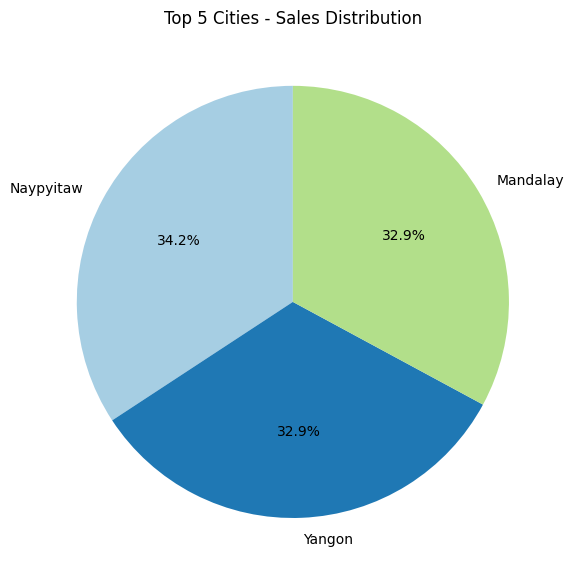

In [331]:
result1.set_index('City', inplace=True)

plt.figure(figsize=(6, 6))
result1['Total_Sales'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Cities - Sales Distribution')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()


In [332]:
query2 = """
SELECT [Product line], ROUND(AVG(Rating), 2) AS Avg_Rating
FROM sales
GROUP BY [Product line]
ORDER BY Avg_Rating DESC;
"""
result2 = pd.read_sql(query2, conn)
print(result2)

             Product line  Avg_Rating
0      Food and beverages        7.11
1     Fashion accessories        7.03
2       Health and beauty        7.00
3       Sports and travel        6.92
4  Electronic accessories        6.92
5      Home and lifestyle        6.84


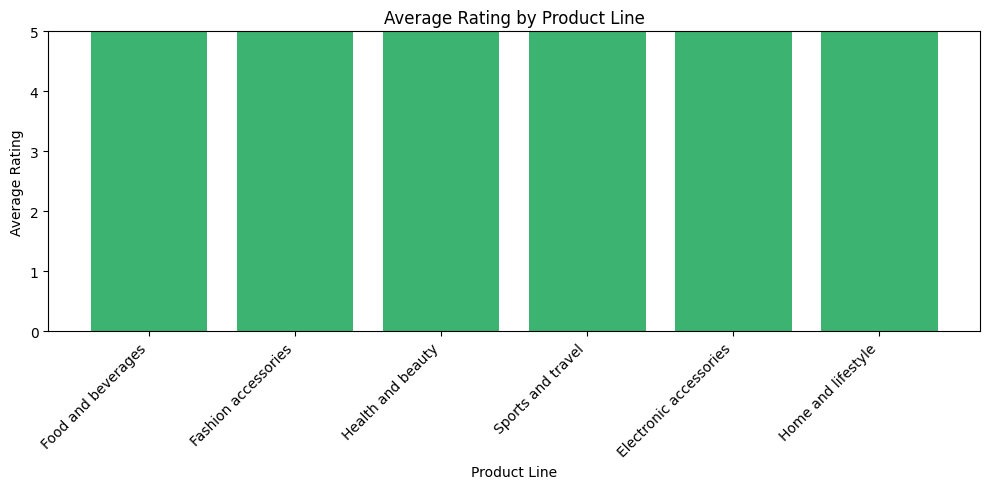

In [333]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(result2['Product line'], result2['Avg_Rating'], color='mediumseagreen')

plt.title("Average Rating by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [334]:
query3 = """
SELECT Payment, COUNT(*) AS Count
FROM sales
GROUP BY Payment
ORDER BY Count DESC;
"""
result3 = pd.read_sql(query3, conn)
print(result3)

       Payment  Count
0      Ewallet    345
1         Cash    344
2  Credit card    311


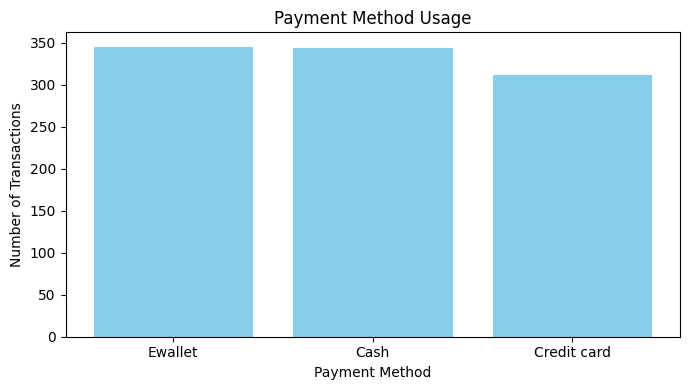

In [335]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.bar(result3['Payment'], result3['Count'], color='skyblue')

plt.title("Payment Method Usage")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [336]:
query4 = """
SELECT Month, ROUND(SUM(Total), 2) AS Monthly_Sales
FROM sales
GROUP BY Month
ORDER BY Month;
"""
result4 = pd.read_sql(query4, conn)
print(result4)

   Month  Monthly_Sales
0      1      116291.87
1      2       97219.37
2      3      109455.51


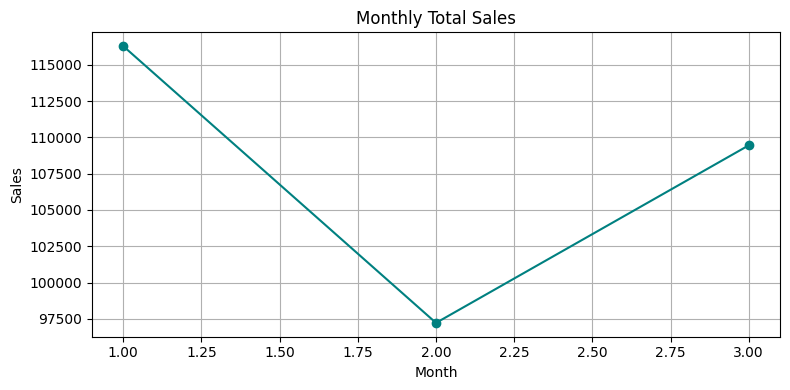

In [337]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(result4['Month'], result4['Monthly_Sales'], marker='o', linestyle='-', color='teal')

plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [338]:
query5 = """
SELECT [Product line], ROUND(SUM(Total), 2) AS Total_Revenue
FROM sales
GROUP BY [Product line]
ORDER BY Total_Revenue DESC;
"""
result5 = pd.read_sql(query5, conn)
print(result5)

             Product line  Total_Revenue
0      Food and beverages       56144.84
1       Sports and travel       55122.83
2  Electronic accessories       54337.53
3     Fashion accessories       54305.89
4      Home and lifestyle       53861.91
5       Health and beauty       49193.74


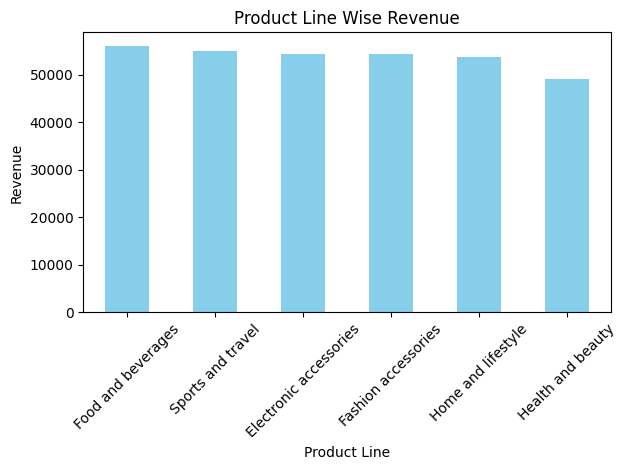

In [339]:
import matplotlib.pyplot as plt

result5.plot(kind='bar', x='Product line', y='Total_Revenue', legend=False, color='skyblue')
plt.title("Product Line Wise Revenue")
plt.ylabel("Revenue")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [340]:
query6 = """
SELECT Gender, ROUND(SUM(Total), 2) AS Revenue
FROM sales
GROUP BY Gender;
"""
result6 = pd.read_sql(query6, conn)
print(result6)

   Gender    Revenue
0  Female  167882.92
1    Male  155083.82


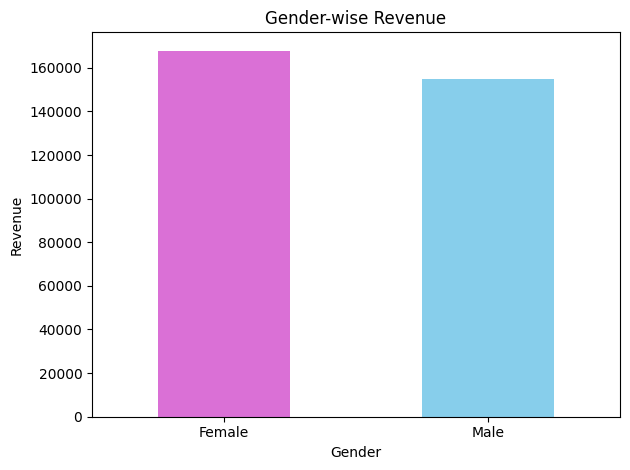

In [341]:
import matplotlib.pyplot as plt

result6.plot(kind='bar', x='Gender', y='Revenue', legend=False, color=['orchid', 'skyblue'])
plt.title("Gender-wise Revenue")
plt.ylabel("Revenue")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [342]:
query7 = """
SELECT Date, ROUND(SUM(Total), 2) AS Daily_Sales
FROM sales
GROUP BY Date
ORDER BY Date;
"""
result7 = pd.read_sql(query7, conn)
print(result7)

                   Date  Daily_Sales
0   2019-01-01 00:00:00      4745.18
1   2019-01-02 00:00:00      1945.50
2   2019-01-03 00:00:00      2078.13
3   2019-01-04 00:00:00      1623.69
4   2019-01-05 00:00:00      3536.68
..                  ...          ...
84  2019-03-26 00:00:00      1962.51
85  2019-03-27 00:00:00      2902.82
86  2019-03-28 00:00:00      2229.40
87  2019-03-29 00:00:00      4023.24
88  2019-03-30 00:00:00      4487.06

[89 rows x 2 columns]


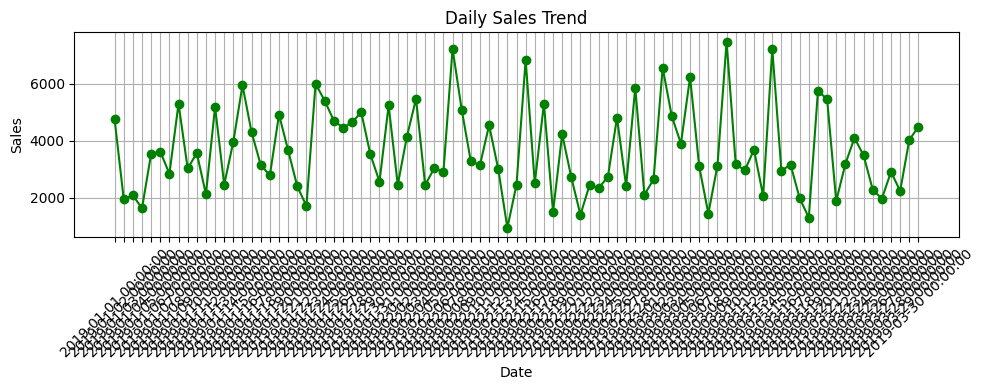

In [343]:
plt.figure(figsize=(10, 4))
plt.plot(result7['Date'], result7['Daily_Sales'], color='green', marker='o')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [344]:
query8 = """
SELECT Branch, [Product line], ROUND(SUM(Total), 2) AS Total_Sales
FROM sales
GROUP BY Branch, [Product line]
ORDER BY Branch, Total_Sales DESC;
"""
result8 = pd.read_sql(query8, conn)
print(result8)

   Branch            Product line  Total_Sales
0       A      Home and lifestyle     22417.20
1       A       Sports and travel     19372.70
2       A  Electronic accessories     18317.11
3       A      Food and beverages     17163.10
4       A     Fashion accessories     16332.51
5       A       Health and beauty     12597.75
6       B       Sports and travel     19988.20
7       B       Health and beauty     19980.66
8       B      Home and lifestyle     17549.16
9       B  Electronic accessories     17051.44
10      B     Fashion accessories     16413.32
11      B      Food and beverages     15214.89
12      C      Food and beverages     23766.85
13      C     Fashion accessories     21560.07
14      C  Electronic accessories     18968.97
15      C       Health and beauty     16615.33
16      C       Sports and travel     15761.93
17      C      Home and lifestyle     13895.55


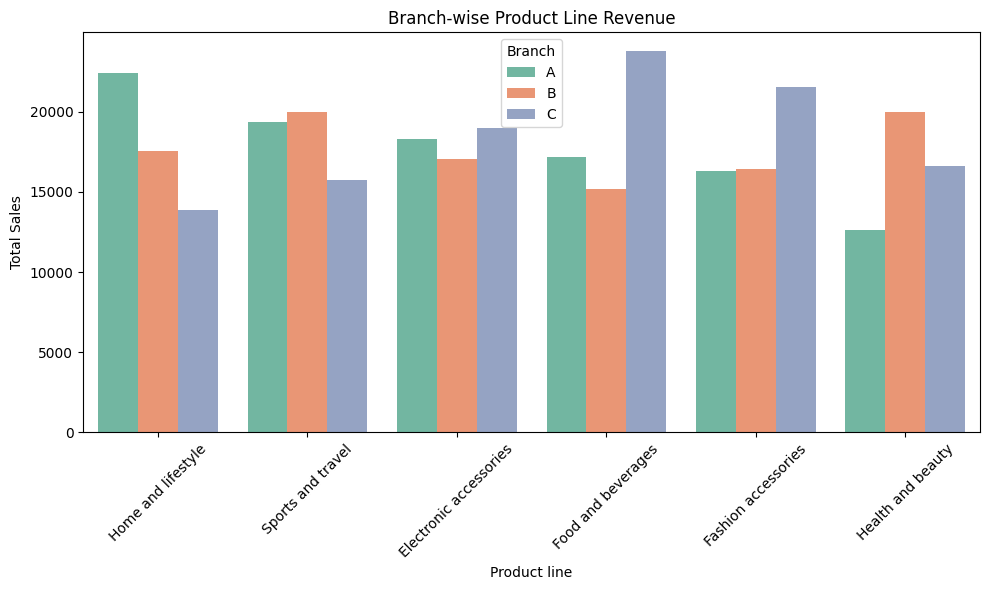

In [345]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=result8, x='Product line', y='Total_Sales', hue='Branch', palette='Set2')
plt.title("Branch-wise Product Line Revenue")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [346]:
query9 = """
SELECT Weekday, Hour, SUM(Total) AS Total_Sales
FROM sales
GROUP BY Weekday, Hour;
"""

result9 = pd.read_sql(query9, conn)
print(result9)

      Weekday  Hour  Total_Sales
0      Friday    10    5671.6905
1      Friday    11    2649.2865
2      Friday    12    2159.2410
3      Friday    13    6824.3070
4      Friday    14    5166.2730
..        ...   ...          ...
72  Wednesday    16    3229.6215
73  Wednesday    17    3101.2695
74  Wednesday    18    4233.7680
75  Wednesday    19    4160.1735
76  Wednesday    20    2782.8360

[77 rows x 3 columns]


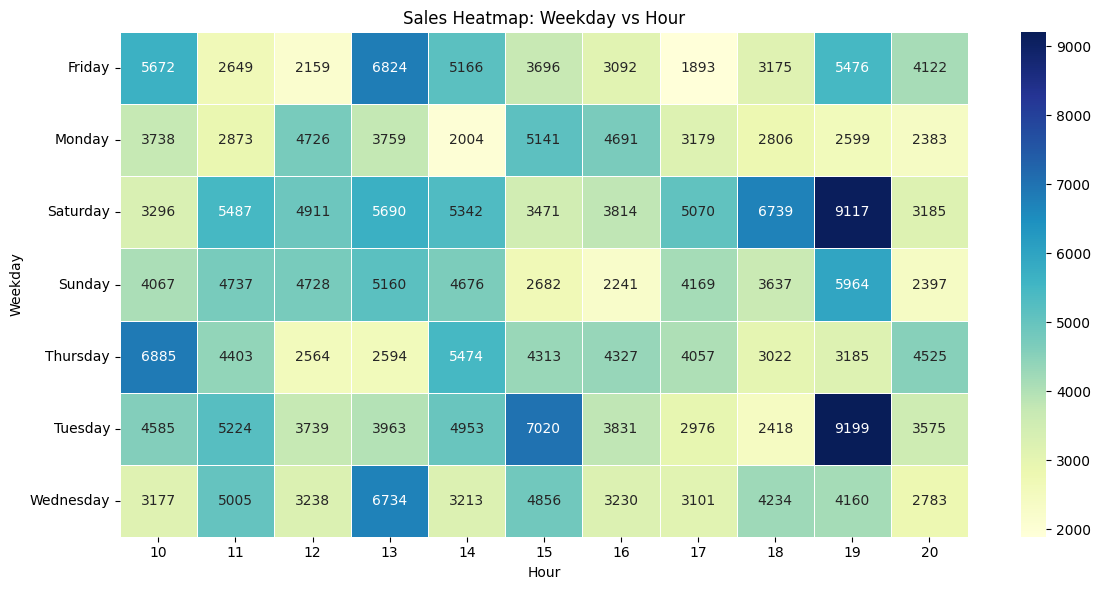

In [347]:
pivot9 = result9.pivot(index='Weekday', columns='Hour', values='Total_Sales')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pivot9, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5, linecolor='white')
plt.title('Sales Heatmap: Weekday vs Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()

In [348]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [349]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:/Users/admin/Desktop/Project2/Walmart-Sales-Data-Analysis--SQL-Project-main/Walmart Sales Data.csv.csv")

df['Hour'] = pd.to_datetime(df['Time'], format="%H:%M", errors='coerce').dt.hour

df['Month'] = pd.to_datetime(df['Date'], format="%m/%d/%Y", errors='coerce').dt.month

X = df[["Gender", "City", "Product line", "Payment", "Total", "Hour", "Month"]].copy()

le = LabelEncoder()
for col in ["Gender", "City", "Product line", "Payment"]:
    X[col] = le.fit_transform(X[col])

y = df["Customer type"]  

df.to_csv(r"C:/Users/admin/Desktop/Project2/Walmart-Sales-Data-Analysis--SQL-Project-main/cleaned_walmart_data.csv", index=False)

print("Data prepared successfully!")

Data prepared successfully!


In [350]:
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Hour', 'Month'],
      dtype='object')


In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [352]:
import numpy as np
import pandas as pd

print("X_train ke missing values:")
print(pd.DataFrame(X_train).isnull().sum())

print("X_test ke missing values:")
print(pd.DataFrame(X_test).isnull().sum())

X_train ke missing values:
Gender            0
City              0
Product line      0
Payment           0
Total             0
Hour            700
Month           700
dtype: int64
X_test ke missing values:
Gender            0
City              0
Product line      0
Payment           0
Total             0
Hour            300
Month           300
dtype: int64


In [353]:
X_train = pd.DataFrame(X_train).dropna()
X_test = pd.DataFrame(X_test).dropna()

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

In [355]:
df = pd.read_csv(r"C:/Users/admin/Desktop/Project2/Walmart-Sales-Data-Analysis--SQL-Project-main/Walmart Sales Data.csv.csv")

In [356]:
target = 'Customer type'

if target not in df.columns:
    raise ValueError(f"Error: Target column '{target}' not found in the dataset.\nAvailable columns: {list(df.columns)}")

X = df.drop(columns=[target])
y = df[target]

X = pd.get_dummies(X, drop_first=True)

if X.shape[0] == 0 or X.shape[1] == 0:
    raise ValueError("Error: Feature matrix X is empty after encoding. Check your data.")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError("Error: Train or Test set is empty after splitting.")

In [357]:
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 

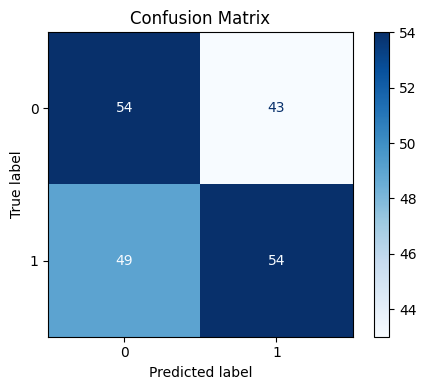

In [358]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5, 4)) 
disp.plot(cmap="Blues", ax=ax)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

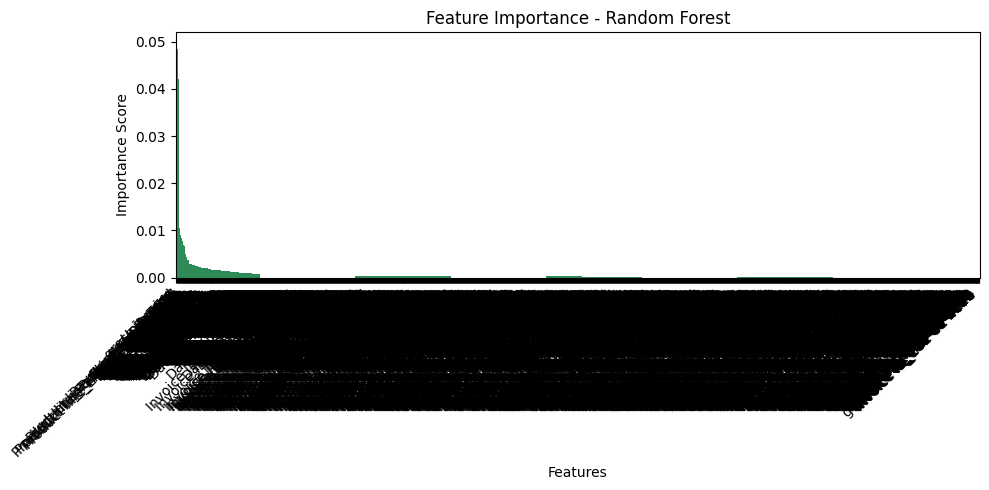

In [365]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns  
feat_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
feat_series.plot(kind='bar', color='seagreen')
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [361]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<Figure size 1000x600 with 0 Axes>

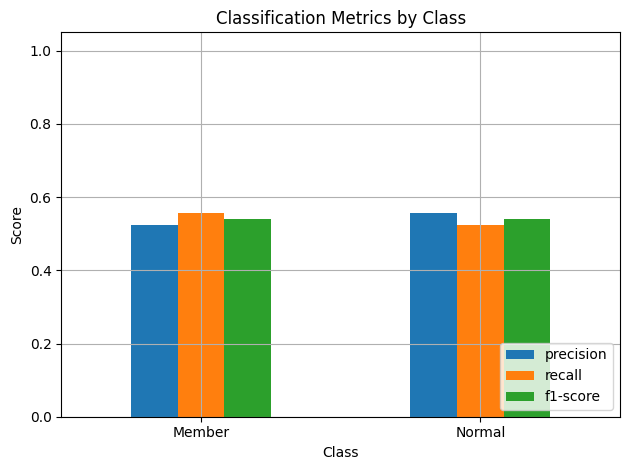

In [362]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

metrics_to_plot = ['precision', 'recall', 'f1-score']
class_labels = [label for label in report_df.index if label not in ['accuracy', 'macro avg', 'weighted avg']]

plt.figure(figsize=(10, 6))
report_df.loc[class_labels, metrics_to_plot].plot(kind='bar')
plt.title('Classification Metrics by Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [363]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.53

Classification Report:
               precision    recall  f1-score   support

      Member       0.51      0.59      0.55        97
      Normal       0.55      0.48      0.51       103

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200


Confusion Matrix:
 [[57 40]
 [54 49]]


In [364]:
import pandas as pd
df = pd.read_csv(r"C:/Users/admin/Desktop/Project2/Walmart-Sales-Data-Analysis--SQL-Project-main/Walmart Sales Data.csv.csv")

In [ ]:
df.to_csv(r"C:/Users/admin/Desktop/Project2/Walmart-Sales-Data-Analysis--SQL-Project-main/cleaned_walmart_data.csv", index=False)